# Self-Driving Car Engineer Nanodegree
# Deep Learning
### Project: Build a Traffic Sign Recognition Classifier


## 0. Load The Data

In [57]:
# Load pickled data
import pickle

# Data location
training_file = "../data/train.p"
validation_file="../data/valid.p"
testing_file = "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## 1. Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

### 1.1 Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [58]:
# TODO: Number of training examples
n_train = len(y_train)
assert(len(X_train)==n_train)

# TODO: Number of validation examples
n_validation = len(y_valid)
assert(len(X_valid)==n_validation)

# TODO: Number of testing examples.
n_test = len(y_test)
assert(len(X_test)==n_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### 1.2 Exploratory visualization of the dataset

Train images example: 

Keep right


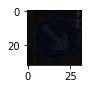

In [59]:
# Import needed libraries
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# Choose a random image
index = random.randint(0,n_train)
image = X_train[index]

# Read the sign Id - convert to name
csv_file = "./signnames.csv"
signnames = {}
signnames_list = []
with open(csv_file) as signnamesfile:
    signnamesDictReader = csv.DictReader(signnamesfile)
    for row in signnamesDictReader:
        signnames[int(row["ClassId"])]=row["SignName"]
        signnames_list.append(row["SignName"])

# Plot image
plt.figure(figsize=(1,1))
plt.imshow(image)
print ("Train images example: ")
print ()
print ( signnames[y_train[index]])

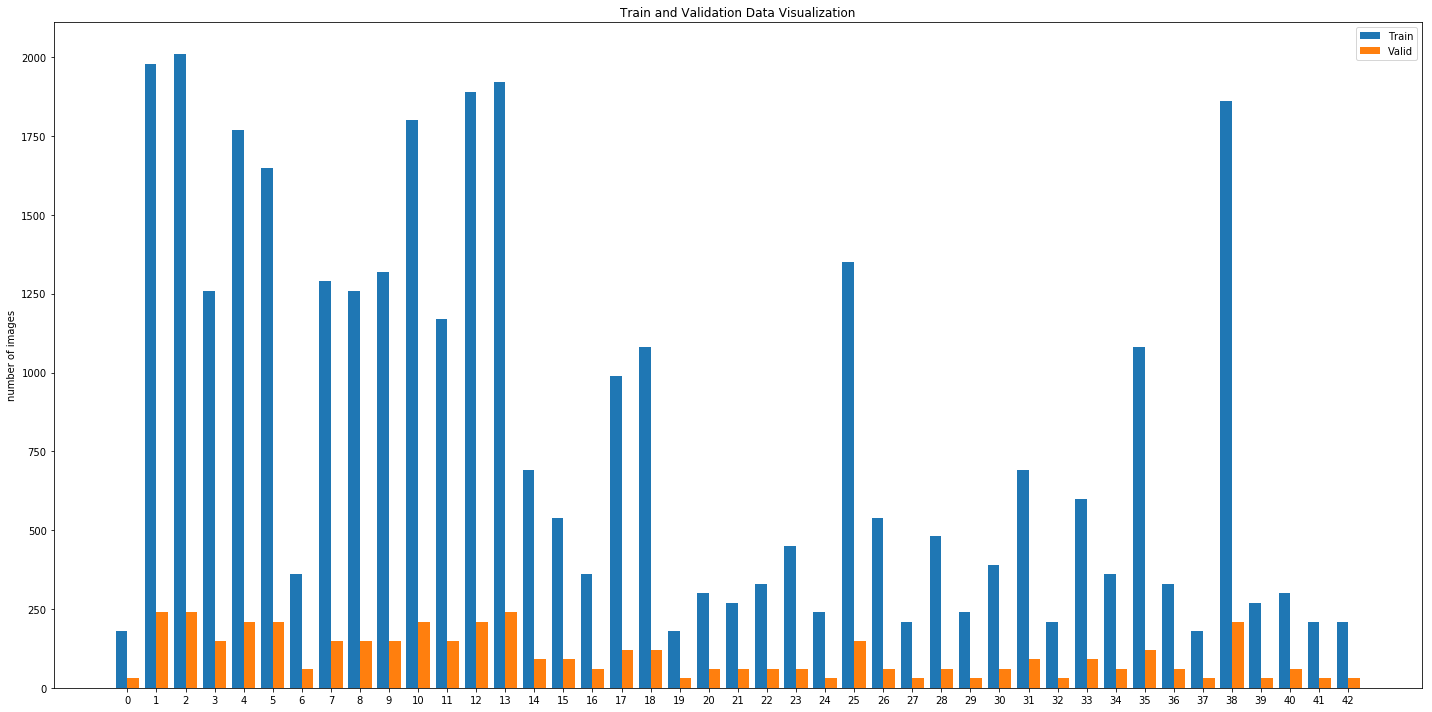

In [60]:
# Count number of images in each class
def count_labels(y, nl):
    ret = {}
    # Initialize frequency dict
    for i in range(0,nl):
        ret[i] = 0
    # Count freg of each class
    for i in y:
        ret[i] = ret[i]+1
    return ret

# Count number of imges in each class
# Test set will remain undiscovered
train_data_info = count_labels(y_train, 43)
valid_data_info = count_labels(y_valid, 43)

# Create data for plotting
labels = []
train_freg = []
valid_freg = []
for i in range(0,43):
    labels.append(str(i))
    train_freg.append(train_data_info[i])
    valid_freg.append(valid_data_info[i])
    

# Plot the data
xloc = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize = (20, 10))
rects1 = ax.bar(xloc - width/2, train_freg, width, label='Train')
rects2 = ax.bar(xloc + width/2, valid_freg, width, label='Valid')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('number of images')
ax.set_title('Train and Validation Data Visualization')
ax.set_xticks(xloc)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.show()

## 2. Design and Test a Model Architecture

### 2.1 Pre-process the Data Set 

In [61]:
# Nomalized data
X_train_nomalized = (X_train/128-1)

In [62]:
# Shuffle data
from sklearn.utils import shuffle
X_train, y_train = shuffle (X_train_nomalized, y_train)

### 2.2 Model Architecture


#### Implement the LeNet-5 neural network architecture.

- Input: The LeNet architecture accepts a 32x32x3 image as input.

- Architecture
    - Layer 1: Convolutional. The output shape should be 28x28x6.

    - Activation: relu

    - Pooling: The output shape should be 14x14x6.

    - Layer 2: Convolutional. The output shape should be 10x10x16.

    - Activation: relu

    - Pooling: The output shape should be 5x5x16.

    - Flatten: Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using tf.contrib.layers.flatten, which is already imported for you.

    - Layer 3: Fully Connected. This should have 120 outputs.

    - Activation: relu.

    - Layer 4: Fully Connected. This should have 84 outputs.

    - Activation: relu.

    - Layer 5: Fully Connected (Logits). This should have 10 outputs.

- Output: Return the result of the 2nd fully connected layer.


In [63]:
import tensorflow as tf

EPOCHS = 500
BATCH_SIZE = 128

In [64]:
from tensorflow.contrib.layers import flatten

def LeNet(x):
    # Hyperparameters
    # more info here about mu and sigma when initiated variable
    # https://stackoverflow.com/questions/41704484/what-is-difference-between-tf-truncated-normal-and-tf-random-normal
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input 32x32x3 Out put 28x28x6
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5,5,3,6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1,1,1,1], padding="VALID") + conv1_b
    
    # Activation
    conv1 = tf.nn.relu(conv1)
    
    # Pooling. Input 28x28x6. Output 14x14x6
    conv1=tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
    
    # Layer 2: Convolutional. Input 14x14x6. Output 10x10x6
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1,conv2_W, strides=[1,1,1,1], padding="VALID") + conv2_b
    
    # Activation
    conv2 = tf.nn.relu(conv2)
    
    # Pooling. Input 10x10x16. Output 5x5x16
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
    
    # Flatten Input 5x5x16. Output 400
    fc0 = flatten(conv2)
    
    # Layer 3: Fully connected. Input 400. Output 120
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400,120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0,fc1_W) + fc1_b
    
    # Activation
    fc1 = tf.nn.relu(fc1)
    
    # Layer 4: Fully connected. Input 120 Output 84
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120,84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1,fc2_W) +fc2_b
    
    # Activation
    fc2 = tf.nn.relu(fc2)
    
    # Layer 5: Fully Connected. Input 84. Output 43
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84,43), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits, conv1, conv2, fc1, fc2

### 2.3 Features and Labels

In [65]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### 2.4 Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [66]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [67]:
rate = 0.001

logits, conv1, conv2, fc1, fc2 = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### 2.5 Model Evaluation

In [68]:
# Compute the accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## 3. Train
##### Saved results:
- Lenet1 : 0.944
- Lenet2 : 0.947
- Lenet3 : 0.945
- Lenet4 : 0.954
- Lenet5 : 0.961
- Lenet6 : 0.960

### 3.1 Train data

In [83]:
# Log loss and accuracy
losses = []
valid_accs = []

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #saver.restore(sess, './lenet3')
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            _, loss = sess.run([training_operation, loss_operation], feed_dict={x: batch_x, y: batch_y})
        losses.append(loss)
            
        validation_accuracy = evaluate(X_valid, y_valid)
        valid_accs.append(validation_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './savedmodels/lenet7')
    print("Model saved")

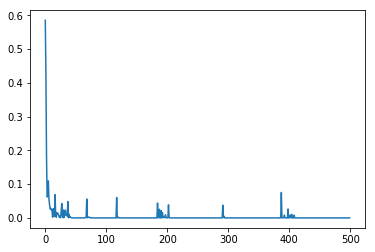

In [85]:
plt.plot(losses)


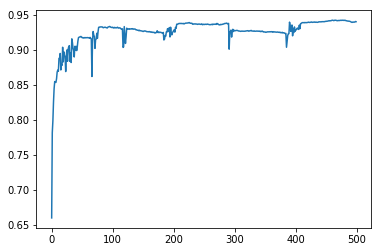

In [86]:
plt.plot(valid_accs)

### 3.2 Evaluate final model 

In [71]:
# Model accuracy on validation set and test set
with tf.Session() as sess:
    saver.restore(sess, './savedmodels/lenet5')
    
    
    X_test_nomalized = (X_test/128 - 1)
    X_valid_nomalized = (X_valid/128 - 1)
    validation_accuracy = evaluate(X_valid_nomalized, y_valid)
    print()
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))
    print()
    test_accuracy = evaluate(X_test_nomalized, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print()

INFO:tensorflow:Restoring parameters from ./savedmodels/lenet5

Validation Accuracy = 0.961

Test Accuracy = 0.942



In [14]:
with tf.Session() as sess:
    saver.restore(sess, './savedmodels/lenet5')   
    prediction_operator = tf.argmax(logits, 1)
    test_prediction = sess.run(prediction_operator, feed_dict={x: X_test}) 

INFO:tensorflow:Restoring parameters from ./savedmodels/lenet5


Confusion matrix, without normalization


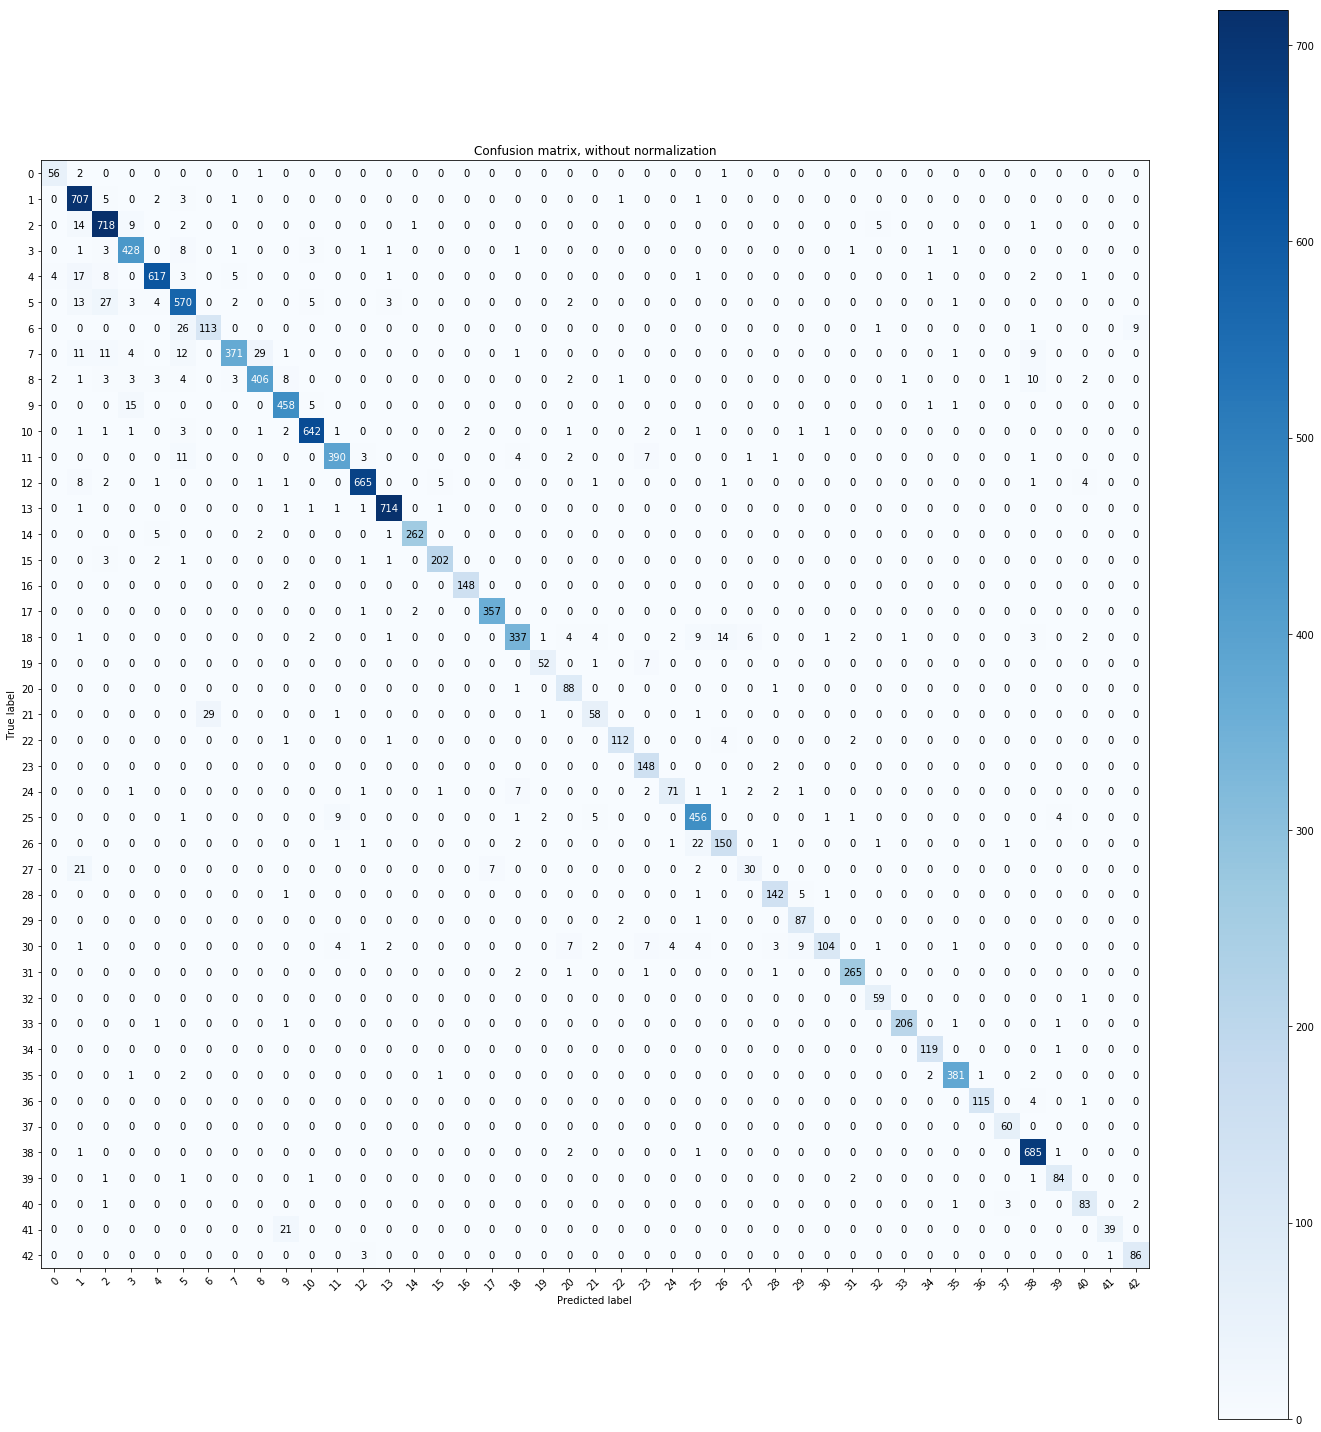

In [117]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    fig, ax = plt.subplots(figsize = (20,20))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return cm



# Plot non-normalized confusion matrix
cm = plot_confusion_matrix(y_test, test_prediction, classes=np.array(range(0,43)),
                      title='Confusion matrix, without normalization')

plt.show()

Incorrect predictions:


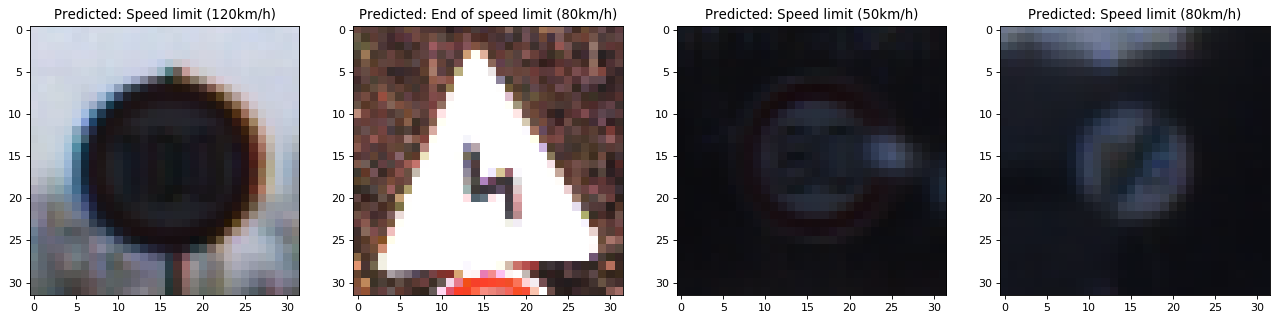

In [116]:
print ("Incorrect predictions:")
# [ true label, predicted label]
incorrect_prediction = [[7,8],[21,6],[5,2],[6,5]]
fig, ax = plt.subplots(1, len(incorrect_prediction), figsize = (20, 20), dpi = 80)
ax = ax.ravel() # Flatten ax[][] for easy use in for loop
for ip in range (len(incorrect_prediction)):
    for i in range(0, len(test_prediction)):
            if (y_test[i] == incorrect_prediction[ip][0]) and (test_prediction[i]==incorrect_prediction[ip][1]):
                ax[ip].title.set_text("Predicted: " + signnames[incorrect_prediction[ip][1]])
                ax[ip].imshow(X_test[i])
                break
plt.show()


## 4. Test a Model on New Images

Predict the traffic sign downloaded from internet.

### 4.1 Load and Output the Images

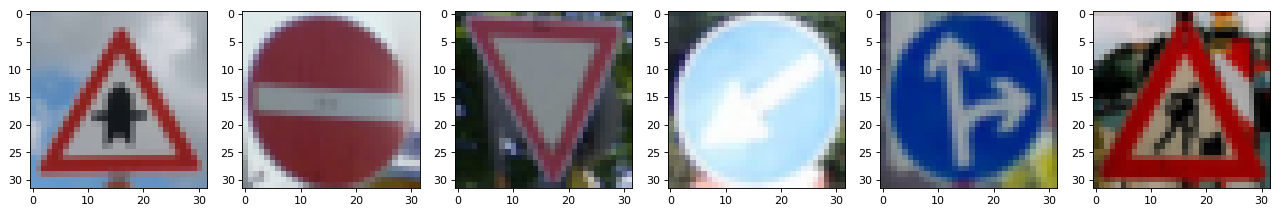

In [73]:
# Load test images.
import matplotlib.image as pltimg
from PIL import Image
test_images = ["test1.JPG","test2.JPG","test3.JPG","test4.JPG","test5.JPG","test6.JPG"]
# Plot
fig, ax = plt.subplots(1, 6, figsize = (20, 20), dpi = 80)
ax = ax.ravel()
images=[]
for i in range (0,len(test_images)):
    img = Image.open("./testimages/"+test_images[i])
    img = img.resize((32, 32), Image.BILINEAR)
    img = np.array(img)
    images.append(img)
    ax[i].imshow(img)
plt.show()

### 4.2 Predict the Sign Type for Each Image

In [76]:
# Run the predictions here and use the model to output the prediction for each image.
# Make sure to pre-process the images with the same pre-processing pipeline used earlier.
# Feel free to use as many code cells as needed.
from numpy import array
result = []
with tf.Session() as sess:
    saver.restore(sess, './savedmodels/lenet5')   
    train_prediction = tf.argmax(logits, 1)
    images_normalized = array(images)/128 - 1
    result = sess.run(train_prediction, feed_dict={x: images_normalized})    

INFO:tensorflow:Restoring parameters from ./savedmodels/lenet5


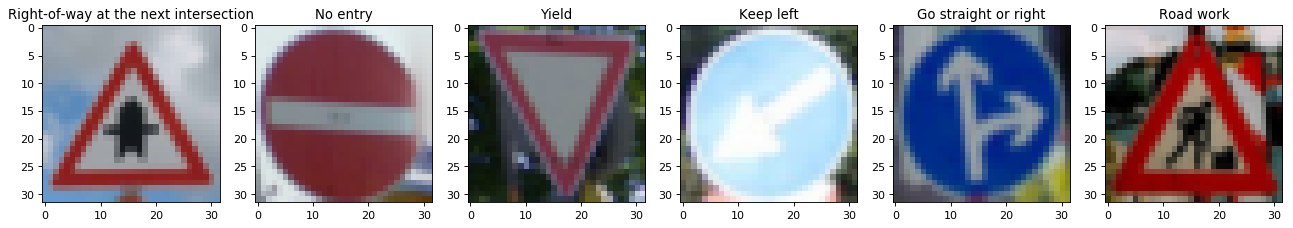

In [77]:
# Plot Image with prediction
fig, ax = plt.subplots(1, 6, figsize = (20, 20), dpi = 80)
ax = ax.ravel() # Flatten ax[][] for easy use in for loop
for i in range (0,len(test_images)):
    ax[i].title.set_text(signnames[result[i]])
    ax[i].imshow(images[i])
plt.show()

### 4.3 Analyze Performance

In [78]:
### Calculate the accuracy for test images
y_test_new = [11, 17, 13, 39, 36, 25]
with tf.Session() as sess:
    saver.restore(sess, './savedmodels/lenet5')
    images_normalized = array(images)/128 - 1
    test_accuracy_new = evaluate(images_normalized, y_test_new)
    print("New images test accuracy = {:.2f}%".format(test_accuracy_new*100))
    print()

INFO:tensorflow:Restoring parameters from ./savedmodels/lenet5
New images test accuracy = 100.00%



### 4.5 Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [79]:
with tf.Session() as sess:
    saver.restore(sess, './savedmodels/lenet5') 
    softmax_operation = tf.nn.softmax(logits,1)
    softmax_top_5 = tf.nn.top_k(softmax_operation,5)
    images_normalized = array(images)/128 - 1
    softmax = sess.run(softmax_top_5, feed_dict={x: images_normalized})

INFO:tensorflow:Restoring parameters from ./savedmodels/lenet5


In [80]:
### Top five softmax probabilities for the predictions on the German traffic sign test image. 
print (softmax)

TopKV2(values=array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   1.65095221e-19,   7.94222433e-22,
          3.03288816e-24,   9.21070246e-25],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   9.42710215e-20,   1.74869706e-25,
          3.12323221e-26,   1.71454445e-28]], dtype=float32), indices=array([[11,  0,  1,  2,  3],
       [17,  0,  1,  2,  3],
       [13,  0,  1,  2,  3],
       [39,  2,  4, 25,  5],
       [36,  0,  1,  2,  3],
       [25, 11, 21, 27, 24]], dtype=int32))


---

## Visualize the Neural Network's State with Test Images

 While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training a neural network we can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

In [22]:
# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # image_input = (1,32,32,3), reshape image to (1,32,32,3) inorder to feed  into x tensor which has shape of (?,32,32,3)
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

INFO:tensorflow:Restoring parameters from ./savedmodels/lenet5


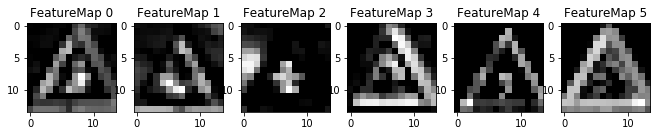

In [30]:
with tf.Session() as sess:
    saver.restore(sess, './savedmodels/lenet5') 
    outputFeatureMap(images, conv1)